In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [23]:
data_processed=pd.read_csv('processed_data.csv')

In [24]:
data_processed.head(10)

,time_from_station,area,building_age,建ぺい率（％）,容積率（％）,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,...,３ＬＤ,３ＬＤＫ,３ＬＫ,４ＤＫ,４Ｋ,４ＬＤＫ,５ＤＫ,５ＬＤＫ,６ＬＤＫ,log_price
0,13.0,85.0,35.0,60.000000,200.0000,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,7.079181
1,13.0,100.0,29.0,60.000000,200.0000,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,7.255273
2,2.0,60.0,22.0,80.000000,300.0000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,7.146128
3,5.0,70.0,29.0,60.000000,200.0000,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,7.301030
4,45.0,75.0,33.0,60.000000,200.0000,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,7.380211
5,23.0,110.0,24.0,67.723845,303.1307,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,7.342423
6,9.0,55.0,33.0,60.000000,200.0000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6.995635
7,9.0,85.0,43.0,60.000000,200.0000,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,7.146128
8,3.0,100.0,23.0,80.000000,300.0000,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,7.278754
9,45.0,75.0,31.0,60.000000,200.0000,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6.690196


#modelを作成する
まず、目的変数と特徴量に分けていく

In [25]:
unscaled_inputs=data_processed.iloc[:,:-1]
unscaled_inputs

,time_from_station,area,building_age,建ぺい率（％）,容積率（％）,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,...,３Ｋ,３ＬＤ,３ＬＤＫ,３ＬＫ,４ＤＫ,４Ｋ,４ＬＤＫ,５ＤＫ,５ＬＤＫ,６ＬＤＫ
0,13.0,85.0,35.0,60.0,200.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,13.0,100.0,29.0,60.0,200.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2.0,60.0,22.0,80.0,300.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,5.0,70.0,29.0,60.0,200.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,45.0,75.0,33.0,60.0,200.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747527,10.0,40.0,35.0,60.0,200.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
747528,8.0,85.0,25.0,60.0,200.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
747529,22.0,100.0,16.0,50.0,150.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
747530,6.0,90.0,10.0,80.0,400.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


次にダミー変数以外の特徴量を標準化していく

In [26]:
from sklearn.preprocessing import StandardScaler

In [29]:
unscaled_inputs1=unscaled_inputs.iloc[:,:5]
unscaled_inputs2=unscaled_inputs.iloc[:,5:]

In [34]:
apartment_scaler=StandardScaler()
apartment_scaler.fit(unscaled_inputs1)

StandardScaler()

In [41]:
raw_scaled_inputs1=apartment_scaler.transform(unscaled_inputs1)

In [38]:
unscaled_inputs1.columns

Index(['time_from_station', 'area', 'building_age', '建ぺい率（％）', '容積率（％）'], dtype='object')

In [43]:
scaled_inputs1=pd.DataFrame(raw_scaled_inputs)
scaled_inputs1

,0,1,2,3,4
0,0.124767,0.996255,0.657820,-0.747833,-0.701291
1,0.124767,1.555455,0.150291,-0.747833,-0.701291
2,-0.797742,0.064255,-0.441826,1.188593,-0.021289
3,-0.546148,0.437055,0.150291,-0.747833,-0.701291
4,2.808430,0.623455,0.488644,-0.747833,-0.701291
...,...,...,...,...,...
747527,-0.126826,-0.681345,0.657820,-0.747833,-0.701291
747528,-0.294555,0.996255,-0.188062,-0.747833,-0.701291
747529,0.879547,1.555455,-0.949356,-1.716046,-1.041292
747530,-0.462284,1.182655,-1.456885,1.188593,0.658713


In [46]:
scaled_inputs1.columns=['time_from_station', 'area', 'building_age', '建ぺい率（％）', '容積率（％）']
scaled_inputs1

,time_from_station,area,building_age,建ぺい率（％）,容積率（％）
0,0.124767,0.996255,0.657820,-0.747833,-0.701291
1,0.124767,1.555455,0.150291,-0.747833,-0.701291
2,-0.797742,0.064255,-0.441826,1.188593,-0.021289
3,-0.546148,0.437055,0.150291,-0.747833,-0.701291
4,2.808430,0.623455,0.488644,-0.747833,-0.701291
...,...,...,...,...,...
747527,-0.126826,-0.681345,0.657820,-0.747833,-0.701291
747528,-0.294555,0.996255,-0.188062,-0.747833,-0.701291
747529,0.879547,1.555455,-0.949356,-1.716046,-1.041292
747530,-0.462284,1.182655,-1.456885,1.188593,0.658713


In [48]:
final_scaled_inputs=pd.concat([scaled_inputs1,unscaled_inputs2],axis=1)
final_scaled_inputs

,time_from_station,area,building_age,建ぺい率（％）,容積率（％）,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,...,３Ｋ,３ＬＤ,３ＬＤＫ,３ＬＫ,４ＤＫ,４Ｋ,４ＬＤＫ,５ＤＫ,５ＬＤＫ,６ＬＤＫ
0,0.124767,0.996255,0.657820,-0.747833,-0.701291,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0.124767,1.555455,0.150291,-0.747833,-0.701291,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,-0.797742,0.064255,-0.441826,1.188593,-0.021289,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.546148,0.437055,0.150291,-0.747833,-0.701291,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2.808430,0.623455,0.488644,-0.747833,-0.701291,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747527,-0.126826,-0.681345,0.657820,-0.747833,-0.701291,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
747528,-0.294555,0.996255,-0.188062,-0.747833,-0.701291,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
747529,0.879547,1.555455,-0.949356,-1.716046,-1.041292,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
747530,-0.462284,1.182655,-1.456885,1.188593,0.658713,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
target=data_processed['log_price']

In [51]:
reg=LinearRegression()

In [52]:
x_train=final_scaled_inputs
y_train=target

In [53]:
reg.fit(x_train,y_train)

LinearRegression()

In [54]:
y_hat=reg.predict(x_train)

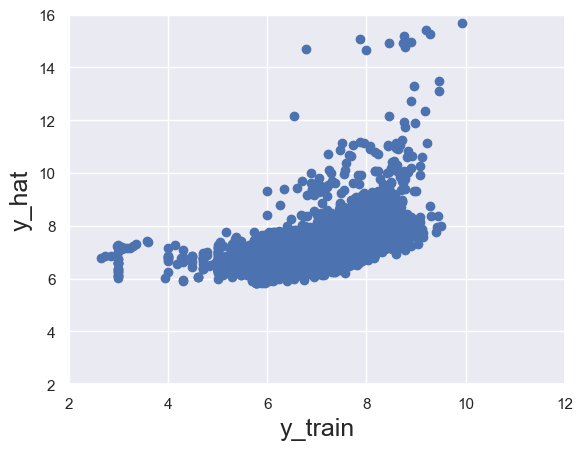

In [58]:
plt.scatter(y_train,y_hat)

plt.xlabel('y_train',size=18)
plt.ylabel('y_hat',size=18)
plt.xlim(2,12)
plt.ylim(2,16)

plt.show()

/var/folders/yj/c6q__rvj7y79ltrr_bxk78mm0000gn/T/ipykernel_30503/1238912141.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat-y_train)


Text(0.5, 1.0, 'Residuals')

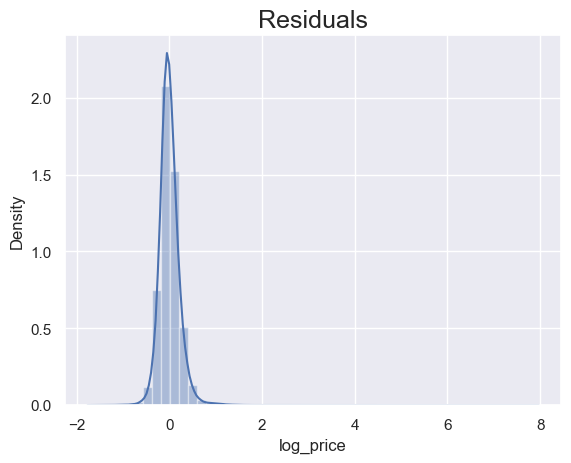

In [59]:
sns.distplot(y_hat-y_train)

plt.title('Residuals',size=18)

In [60]:
reg.score(x_train,y_train)

0.6192960363178117

In [61]:
reg.intercept_

6.932573688621834

In [62]:
reg.coef_

array([-0.05743357,  0.10771258, -0.18370044, -0.02299396,  0.06316778,
        0.03671583,  0.35035163,  0.09040405,  0.18123077,  0.09122886,
       -0.03565312,  0.08021718, -0.20835246, -0.07466204, -0.04539811,
       -0.00656679,  0.06569939,  0.02059461,  0.10509625,  0.05598763,
        0.13689933,  0.07841112,  0.02290944,  0.10383652, -0.05274054,
       -0.13246854,  0.09003668,  0.01047721, -0.18547315,  0.02800718,
       -0.07770316,  0.0678158 ,  0.10308799,  0.06473548, -0.03093813,
       -0.08585648, -0.03800388,  0.06918536,  0.05689326, -0.03581147,
       -0.07535042,  0.08689811, -0.00870471,  0.07975169, -0.01678704])

In [70]:
reg_summary=pd.DataFrame(final_scaled_inputs.columns.values,columns=['Feature'])
reg_summary['coefficient']=reg.coef_
reg_summary

,Feature,coefficient
0,time_from_station,-0.057434
1,area,0.107713
2,building_age,-0.183700
3,建ぺい率（％）,-0.022994
4,容積率（％）,0.063168
5,Hokkaido_Tohoku,0.036716
6,Kanto,0.350352
7,Chubu,0.090404
8,Kinki,0.181231
9,Chugoku,0.091229


作成したモデルに関してテストデータを用いて、テストを行う

In [101]:
pd.options.display.max_columns=70
df_test=pd.read_csv('test_data')

x_test=df_test
x_test

,time_from_station,area,building_age,建ぺい率（％）,容積率（％）,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu,軽量鉄骨造,鉄骨造,ＲＣ,ＲＣ、鉄骨造,ＳＲＣ,ＳＲＣ、鉄骨造,ＳＲＣ、ＲＣ,ＳＲＣ、ＲＣ、鉄骨造,改装済,１ＤＫ,１Ｋ,１ＬＤＫ,１Ｒ,２ＤＫ,２Ｋ,２ＬＤＫ,３ＤＫ,３Ｋ,３ＬＤＫ,４ＤＫ,４ＬＤＫ
0,-0.757707,1.605802,-1.022118,1.080280,1.838408,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,-0.499072,-0.865757,1.068900,1.080280,0.527762,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,-0.930131,-0.689217,1.591654,1.080280,0.527762,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,-0.757707,0.546563,1.292938,1.080280,-0.127561,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,-0.843919,0.546563,0.994221,-0.854241,-0.782883,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18688,1.311376,1.076182,0.396787,-0.854241,-0.782883,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
18689,-0.240437,1.252722,-0.648722,1.080280,0.527762,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
18690,0.621682,1.429262,0.695504,-0.854241,-0.782883,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18691,-0.585284,0.016943,0.770183,1.080280,0.527762,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False



#'１ＤＫ', '１Ｋ','１ＬＤＫ', '１ＬＫ', '１Ｒ', '２ＤＫ', '２Ｋ', '２ＬＤ＋Ｓ', '２ＬＤＫ', '２ＬＫ', '３ＤＫ',
       '３Ｋ', '３ＬＤ', '３ＬＤＫ', '３ＬＫ', '４ＤＫ', '４Ｋ', '４ＬＤＫ', '５ＤＫ', '５ＬＤＫ',
       '６ＬＤＫ'

1LK,2LD+S,2LK,3LD,4K'５ＤＫ', '５ＬＤＫ','６ＬＤＫ'

In [114]:
x_test['１ＬＫ']=~(x_test.any(axis=1))
x_test['２ＬＤ＋Ｓ']=~(x_test.any(axis=1))
x_test['２ＬＫ']=~(x_test.any(axis=1))
x_test['３ＬＤ']=~(x_test.any(axis=1))
x_test['４Ｋ']=~(x_test.any(axis=1))
x_test['５ＤＫ']=~(x_test.any(axis=1))
x_test['５ＬＤＫ']=~(x_test.any(axis=1))
x_test['６ＬＤＫ']=~(x_test.any(axis=1))
x_test['メゾネット']=~(x_test.any(axis=1))
x_test['木造']=~(x_test.any(axis=1))
x_test['スタジオ']=~(x_test.any(axis=1))
x_test['３ＬＫ']=~(x_test.any(axis=1))
x_test

,time_from_station,area,building_age,建ぺい率（％）,容積率（％）,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu,軽量鉄骨造,鉄骨造,ＲＣ,ＲＣ、鉄骨造,ＳＲＣ,ＳＲＣ、鉄骨造,ＳＲＣ、ＲＣ,ＳＲＣ、ＲＣ、鉄骨造,改装済,１ＤＫ,１Ｋ,１ＬＤＫ,１Ｒ,２ＤＫ,２Ｋ,２ＬＤＫ,３ＤＫ,３Ｋ,３ＬＤＫ,４ＤＫ,４ＬＤＫ,１ＬＫ,２ＬＤ＋Ｓ,２ＬＫ,３ＬＤ,４Ｋ,５ＤＫ,５ＬＤＫ,６ＬＤＫ,メゾネット,木造,スタジオ,３ＬＫ
0,-0.757707,1.605802,-1.022118,1.080280,1.838408,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,-0.499072,-0.865757,1.068900,1.080280,0.527762,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,-0.930131,-0.689217,1.591654,1.080280,0.527762,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,-0.757707,0.546563,1.292938,1.080280,-0.127561,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,-0.843919,0.546563,0.994221,-0.854241,-0.782883,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18688,1.311376,1.076182,0.396787,-0.854241,-0.782883,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18689,-0.240437,1.252722,-0.648722,1.080280,0.527762,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
18690,0.621682,1.429262,0.695504,-0.854241,-0.782883,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18691,-0.585284,0.016943,0.770183,1.080280,0.527762,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [116]:
x_train.columns

Index(['time_from_station', 'area', 'building_age', '建ぺい率（％）', '容積率（％）',
       'Hokkaido_Tohoku', 'Kanto', 'Chubu', 'Kinki', 'Chugoku', 'Sikoku',
       'Kyusyu', '木造', '軽量鉄骨造', '鉄骨造', 'ＲＣ', 'ＲＣ、鉄骨造', 'ＳＲＣ', 'ＳＲＣ、鉄骨造',
       'ＳＲＣ、ＲＣ', 'ＳＲＣ、ＲＣ、鉄骨造', '改装済', 'スタジオ', 'メゾネット', '１ＤＫ', '１Ｋ', '１ＬＤＫ',
       '１ＬＫ', '１Ｒ', '２ＤＫ', '２Ｋ', '２ＬＤ＋Ｓ', '２ＬＤＫ', '２ＬＫ', '３ＤＫ', '３Ｋ', '３ＬＤ',
       '３ＬＤＫ', '３ＬＫ', '４ＤＫ', '４Ｋ', '４ＬＤＫ', '５ＤＫ', '５ＬＤＫ', '６ＬＤＫ'],
      dtype='object')

In [118]:
x_test=x_test[['time_from_station', 'area', 'building_age', '建ぺい率（％）', '容積率（％）',
       'Hokkaido_Tohoku', 'Kanto', 'Chubu', 'Kinki', 'Chugoku', 'Sikoku',
       'Kyusyu', '木造', '軽量鉄骨造', '鉄骨造', 'ＲＣ', 'ＲＣ、鉄骨造', 'ＳＲＣ', 'ＳＲＣ、鉄骨造',
       'ＳＲＣ、ＲＣ', 'ＳＲＣ、ＲＣ、鉄骨造', '改装済', 'スタジオ', 'メゾネット', '１ＤＫ', '１Ｋ', '１ＬＤＫ',
       '１ＬＫ', '１Ｒ', '２ＤＫ', '２Ｋ', '２ＬＤ＋Ｓ', '２ＬＤＫ', '２ＬＫ', '３ＤＫ', '３Ｋ', '３ＬＤ',
       '３ＬＤＫ', '３ＬＫ', '４ＤＫ', '４Ｋ', '４ＬＤＫ', '５ＤＫ', '５ＬＤＫ', '６ＬＤＫ']]
x_test

,time_from_station,area,building_age,建ぺい率（％）,容積率（％）,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu,木造,軽量鉄骨造,鉄骨造,ＲＣ,ＲＣ、鉄骨造,ＳＲＣ,ＳＲＣ、鉄骨造,ＳＲＣ、ＲＣ,ＳＲＣ、ＲＣ、鉄骨造,改装済,スタジオ,メゾネット,１ＤＫ,１Ｋ,１ＬＤＫ,１ＬＫ,１Ｒ,２ＤＫ,２Ｋ,２ＬＤ＋Ｓ,２ＬＤＫ,２ＬＫ,３ＤＫ,３Ｋ,３ＬＤ,３ＬＤＫ,３ＬＫ,４ＤＫ,４Ｋ,４ＬＤＫ,５ＤＫ,５ＬＤＫ,６ＬＤＫ
0,-0.757707,1.605802,-1.022118,1.080280,1.838408,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,-0.499072,-0.865757,1.068900,1.080280,0.527762,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,-0.930131,-0.689217,1.591654,1.080280,0.527762,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,-0.757707,0.546563,1.292938,1.080280,-0.127561,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,-0.843919,0.546563,0.994221,-0.854241,-0.782883,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18688,1.311376,1.076182,0.396787,-0.854241,-0.782883,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
18689,-0.240437,1.252722,-0.648722,1.080280,0.527762,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
18690,0.621682,1.429262,0.695504,-0.854241,-0.782883,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18691,-0.585284,0.016943,0.770183,1.080280,0.527762,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [119]:
y_hat_test=reg.predict(x_test)
##エラーは間取りに関するコラムが一致していない　直さなければならぬ
##trainデータでは出てきた特徴量だけど、testデータでは出てこなかった時はどうすればいいのか

In [125]:
y_prediction=pd.DataFrame(y_hat_test)
y_prediction.columns=['y_prediction']
y_prediction

,y_prediction
0,7.527443
1,6.737435
2,6.499704
3,6.863887
4,7.032372
...,...
18688,7.074374
18689,7.396695
18690,6.966893
18691,6.956152
